# Machine Learning e Data Science com Python de A à Z

# Tratamento de dados desbalanceados

## Dados desbalanceados

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Retorna a quantidade de registros de cada classe
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

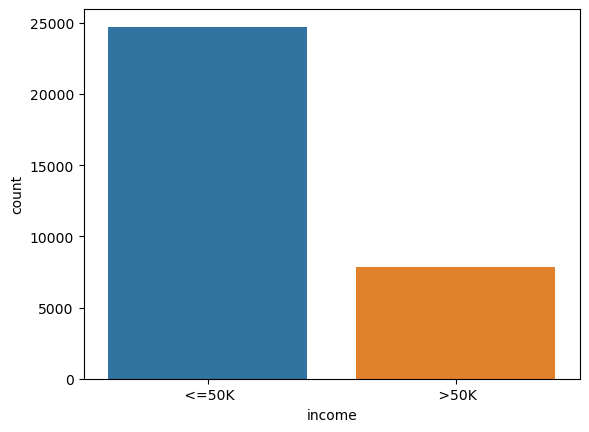

In [4]:
sns.countplot(x = base_census['income']);

In [5]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [6]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [8]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [9]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

## Subamostragem com Tomek Links

In [10]:
from imblearn.under_sampling import TomekLinks

In [11]:
tl = TomekLinks(sampling_strategy='all')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [12]:
X_under.shape, y_under.shape

((27763, 14), (27763,))

In [13]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [14]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder.fit_transform(X_under).toarray()
X_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [16]:
X_census.shape, X_under.shape

((27763, 108), (27763, 14))

In [17]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((23598, 14), (4165, 14))

In [18]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.92      0.97      0.94      3347
        >50K       0.82      0.64      0.72       818

    accuracy                           0.90      4165
   macro avg       0.87      0.80      0.83      4165
weighted avg       0.90      0.90      0.90      4165



## Sobreamostragem com SMOTE

In [20]:
base_census = pd.read_csv('census.csv')

In [21]:
X_census = base_census.iloc[:, 0:14].values

In [22]:
y_census = base_census.iloc[:, 14].values

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [24]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X_census.shape

(32561, 14)

In [27]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [28]:
X_over.shape

(49440, 14)

In [29]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [30]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [31]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
#X_census = onehotencoder.fit_transform(X_over).toarray()
#X_census'''

In [32]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [34]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9104638619201726

In [35]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.93      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

